In [1]:
import requests
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')
pd.set_option('expand_frame_repr', False)

In [33]:
headers = {"User-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36",
           "Accept": "text/html, application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8"}
p = {'symbol':'ETHUSDT', 'period':'5m'}
base_url = 'https://fapi.binance.com/futures/data/topLongShortPositionRatio'

In [34]:
def timeStamp(timeNum): 
    timeStamp = float(timeNum/1000) 
    timeArray = time.localtime(timeStamp) 
    otherStyleTime = time.strftime("%Y-%m-%d %H:%M:%S", timeArray)
    return otherStyleTime

In [35]:
resp = requests.get(base_url, headers=headers, params=p)
data = resp.json()

In [36]:
df = pd.DataFrame(data)

In [37]:
df['timestamp'] = df['timestamp'].apply(lambda x :timeStamp(x)).astype('datetime64[ns]')
df.set_index('timestamp', inplace=True)
df[['longAccount','longShortRatio','shortAccount']] = df[['longAccount','longShortRatio','shortAccount']].astype('float32')

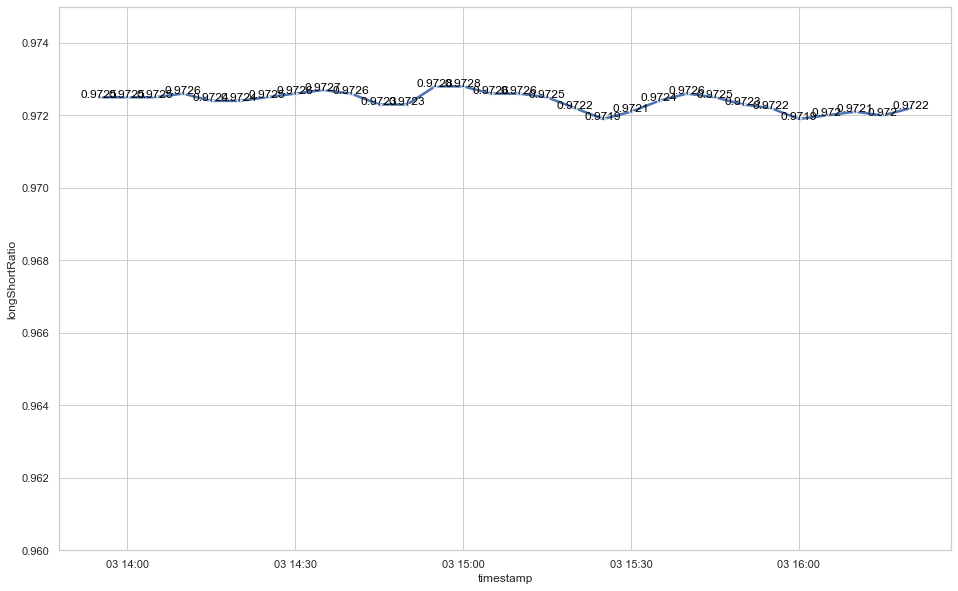

In [38]:

plt.figure(figsize=(16,10))
plt.ylim(0.96,0.975)
ax =sns.lineplot(data=df['longShortRatio'], palette='tab10', marker='*', linewidth=2.5)

for index,row in df.iterrows():
    ax.text(row.name,row.longShortRatio,round(row.longShortRatio,4),color="black",ha="center")
    
plt.show()

In [39]:
df

,symbol,longAccount,longShortRatio,shortAccount
timestamp,,,,
2021-11-03 13:55:00,ETHUSDT,0.4930,0.9725,0.5070
2021-11-03 14:00:00,ETHUSDT,0.4930,0.9725,0.5070
2021-11-03 14:05:00,ETHUSDT,0.4930,0.9725,0.5070
2021-11-03 14:10:00,ETHUSDT,0.4930,0.9726,0.5070
2021-11-03 14:15:00,ETHUSDT,0.4930,0.9724,0.5070
2021-11-03 14:20:00,ETHUSDT,0.4930,0.9724,0.5070
2021-11-03 14:25:00,ETHUSDT,0.4930,0.9725,0.5070
2021-11-03 14:30:00,ETHUSDT,0.4931,0.9726,0.5069
2021-11-03 14:35:00,ETHUSDT,0.4931,0.9727,0.5069
